In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
#if you dont have graphviz install
!conda install python-graphviz

In [5]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz 

In [50]:
df=pd.read_csv('C:\\Users\\Milica\\Desktop\\apple_quality.csv')
df.head()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [51]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [52]:
#drop irrelevant columns
df=df.drop(columns=['A_id'])

In [53]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [54]:
columns_with_na=df.isna()
print(columns_with_na)
print('Number of rows with na values: ',df.isna().any(axis=1).sum())
# one row is problematic

       Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  \
0     False   False      False        False      False     False    False   
1     False   False      False        False      False     False    False   
2     False   False      False        False      False     False    False   
3     False   False      False        False      False     False    False   
4     False   False      False        False      False     False    False   
...     ...     ...        ...          ...        ...       ...      ...   
3996  False   False      False        False      False     False    False   
3997  False   False      False        False      False     False    False   
3998  False   False      False        False      False     False    False   
3999  False   False      False        False      False     False    False   
4000   True    True       True         True       True      True    False   

      Quality  
0       False  
1       False  
2       False  
3       Fal

In [55]:
df = df.drop(4000)

In [56]:
df.Quality.value_counts()
#well balanced

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [57]:
x=df.drop(['Quality'],axis=1)


In [58]:
y=df.Quality
y.size

4000

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [69]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

# Evaluate performance on testing set
test_accuracy = accuracy_score(y_test, tree.predict(x_test))
print("Testing Accuracy (before pruning):", test_accuracy)

max_depths=[3,4,5,6,7,10,13]

for max_depth in max_depths:
    # Train a decision tree classifier with the current max_depth
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(x_train, y_train)

    # Evaluate performance on testing set
    test_accuracy = accuracy_score(y_test, tree.predict(x_test))
    print(f"Testing Accuracy (max_depth={max_depth}): {test_accuracy}")


Testing Accuracy (before pruning): 0.81
Testing Accuracy (max_depth=3): 0.69375
Testing Accuracy (max_depth=4): 0.7425
Testing Accuracy (max_depth=5): 0.74
Testing Accuracy (max_depth=6): 0.795
Testing Accuracy (max_depth=7): 0.80875
Testing Accuracy (max_depth=10): 0.80625
Testing Accuracy (max_depth=13): 0.81625


In [88]:
rf = RandomForestClassifier(random_state=42)
#train the model
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

Accuracy: 0.89625


In [75]:
from sklearn.tree import export_graphviz
tree=rf.estimators_[0]
dot_data=export_graphviz(tree,
                            feature_names=x_train.columns,  
                            filled=True,  
                            max_depth=2, 
                            impurity=False, 
                            proportion=True)

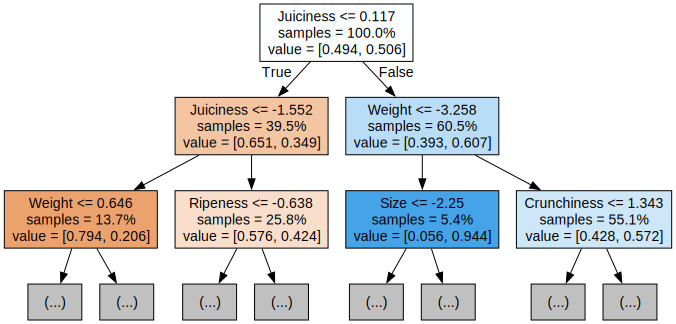

In [76]:
graph = graphviz.Source(dot_data)
display(graph)

In [22]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# hyperparameter tuning
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014649343BD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001464ADEBDD0>})

In [32]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 294}


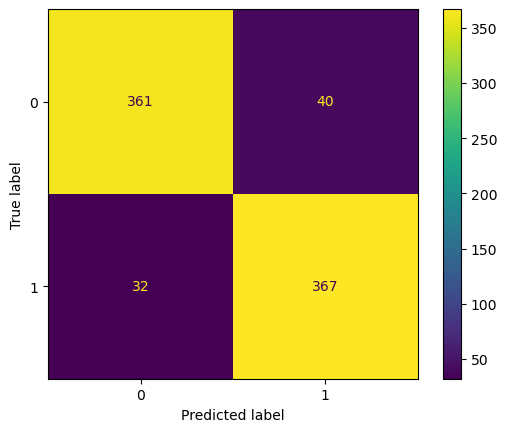

In [25]:
y_pred = best_rf.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [81]:
from sklearn.metrics import precision_score,accuracy_score,recall_score, f1_score,roc_auc_score

print("Precision:",precision_score(y_test, y_pred, pos_label='good'))
print("Recall:",accuracy_score(y_test, y_pred))
print("Accuracy:",recall_score(y_test, y_pred, pos_label='good'))
print("F1:",f1_score(y_test, y_pred, pos_label='good'))
y_pred_proba = rf.predict_proba(x_test)[:, 1]
print("ROC AUC score:", roc_auc_score(y_test, y_pred_proba))

Precision: 0.957286432160804
Recall: 0.95625
Accuracy: 0.9548872180451128
F1: 0.9560853199498118
ROC AUC score: 0.9581997387483671


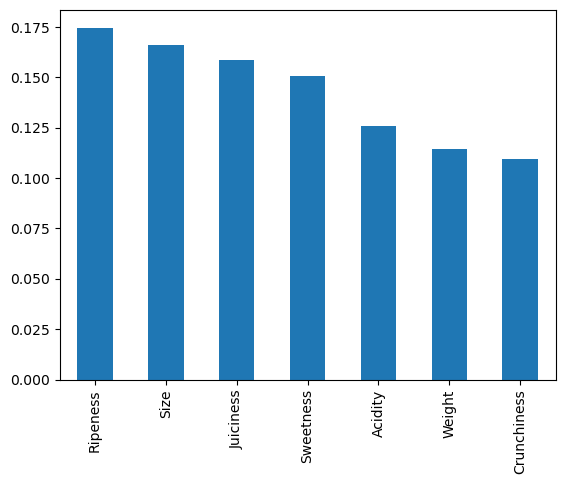

In [77]:
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_importances.plot.bar();

In [97]:
#examine the features
x['Quality numeric']=y.map({'good':1,'bad':0})
correlation_matrix=x.corr()

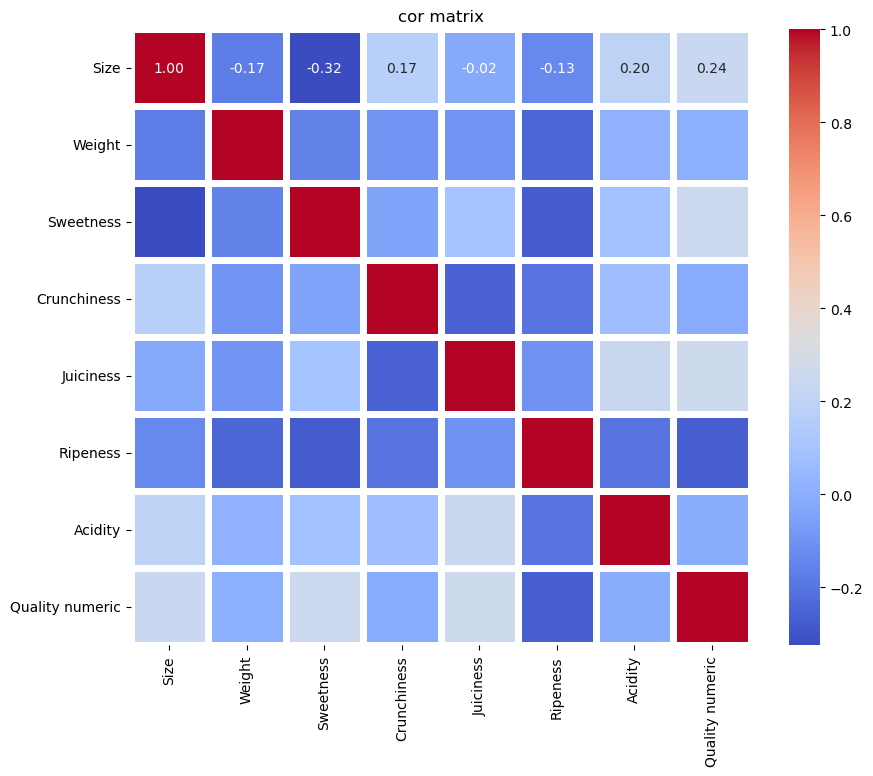

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidth=5)
plt.title('cor matrix')
plt.show()
x.drop(columns=['Quality numeric'], inplace=True)

In [73]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [95]:
#lets see how some other classifiers perform
classifiers = [
    DecisionTreeClassifier(max_depth=13, random_state=42),
    GradientBoostingClassifier(random_state=42),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier(max_iter=2000, random_state=42),
]
for clf in classifiers:
    clf.fit(x_train,y_train)
    print(f'\nClassifier: {clf.__class__.__name__}')
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    if hasattr(clf, "predict_proba"):  
        y_pred_proba = clf.predict_proba(x_test)[:, 1]  
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'ROC AUC: {roc_auc:.2f}')
    else:
        roc_auc = None  # Some classifiers like SVC don't support predict_proba
    classification_rep = classification_report(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(classification_rep)
    print('----------------------------' )



Classifier: DecisionTreeClassifier
ROC AUC: 0.83
Accuracy: 0.82
Confusion Matrix:
[[325  76]
 [ 71 328]]
Classification Report:
              precision    recall  f1-score   support

         bad       0.82      0.81      0.82       401
        good       0.81      0.82      0.82       399

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

----------------------------

Classifier: GradientBoostingClassifier
ROC AUC: 0.94
Accuracy: 0.87
Confusion Matrix:
[[349  52]
 [ 52 347]]
Classification Report:
              precision    recall  f1-score   support

         bad       0.87      0.87      0.87       401
        good       0.87      0.87      0.87       399

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800

----------------------------

Classifier: LogisticRegre